# COVID-19_e996feaa analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

## data sources (acquired reliably from CERN)

```Bash
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6

import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

covid19 = COVID19Py.COVID19(data_source='jhu')
with open(new_filename(), 'wb') as f:
    pickle.dump(covid19, f)

data = covid19.getAll(timelines=True)
   data = covid19.getAll(timelines=True)
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows"   , 500)
pd.set_option("display.max_columns", 500)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    data
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
if 1:
    with open('f94e6997.pkl', 'rb') as f:
        covid19 = pickle.load(f)
    with open('120141ce.pkl', 'rb') as f:
        data = pickle.load(f)

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

CPU times: user 3.9 ms, sys: 0 ns, total: 3.9 ms
Wall time: 3.36 ms


In [5]:
df = pd.DataFrame(data['locations'])
df.head()
#df

,id,country,country_code,country_population,province,last_updated,coordinates,latest,timelines
0,0,Afghanistan,AF,29121286.0,,2020-04-06T07:25:05.647083Z,"{'latitude': '33.0', 'longitude': '65.0'}","{'confirmed': 349, 'deaths': 7, 'recovered': 0}","{'confirmed': {'latest': 349, 'timeline': {'20..."
1,1,Albania,AL,2986952.0,,2020-04-06T07:25:05.650175Z,"{'latitude': '41.1533', 'longitude': '20.1683'}","{'confirmed': 361, 'deaths': 20, 'recovered': 0}","{'confirmed': {'latest': 361, 'timeline': {'20..."
2,2,Algeria,DZ,34586184.0,,2020-04-06T07:25:05.653283Z,"{'latitude': '28.0339', 'longitude': '1.6596'}","{'confirmed': 1320, 'deaths': 152, 'recovered'...","{'confirmed': {'latest': 1320, 'timeline': {'2..."
3,3,Andorra,AD,84000.0,,2020-04-06T07:25:05.656321Z,"{'latitude': '42.5063', 'longitude': '1.5218'}","{'confirmed': 501, 'deaths': 18, 'recovered': 0}","{'confirmed': {'latest': 501, 'timeline': {'20..."
4,4,Angola,AO,13068161.0,,2020-04-06T07:25:05.659357Z,"{'latitude': '-11.2027', 'longitude': '17.8739'}","{'confirmed': 14, 'deaths': 2, 'recovered': 0}","{'confirmed': {'latest': 14, 'timeline': {'202..."


---

In [6]:
locations = {}

# South Korea

In [7]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = location['timelines'].values[0]

confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

# merge
location = confirmed
location['deaths']       = deaths['deaths']
location['recovered']    = recovered['recovered']

# visual estimate of changes
half_mean_of_confirmed_cases = location['confirmed'].mean()/2
half_mean_of_deaths_cases    = location['confirmed'].mean()/2
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed'].pct_change()
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths'].pct_change()
# linear interpolation
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = location['deaths_percentage_change_by_half_mean_deaths_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location.tail()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
datetime,,,,,
2020-04-01 00:00:00+00:00,9887,165,NaN,21.150896,37.950617
2020-04-02 00:00:00+00:00,9976,169,NaN,18.447524,49.680808
2020-04-03 00:00:00+00:00,10062,174,NaN,17.666667,60.631164
2020-04-04 00:00:00+00:00,10156,177,NaN,19.145034,35.333333
2020-04-05 00:00:00+00:00,10237,183,NaN,16.344624,69.468927


In [8]:
# reindex to first confirmed case
location = location.query('confirmed > 0').reset_index(); del location['datetime']
location.head()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
0,1,0,NaN,NaN,NaN
1,1,0,NaN,NaN,NaN
2,2,0,NaN,2049.333333,NaN
3,2,0,NaN,2049.333333,NaN
4,3,0,NaN,1024.666667,NaN


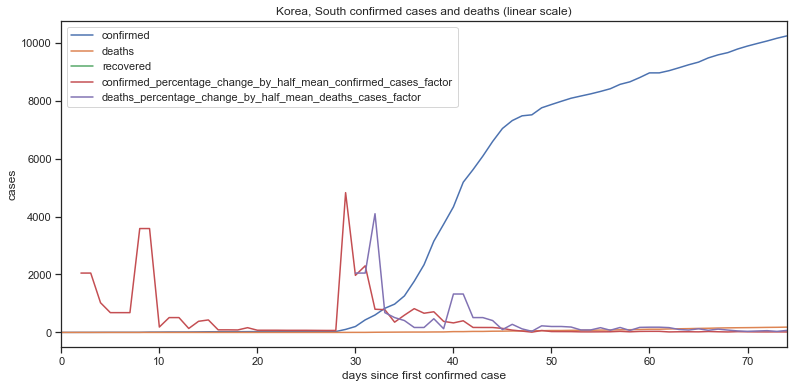

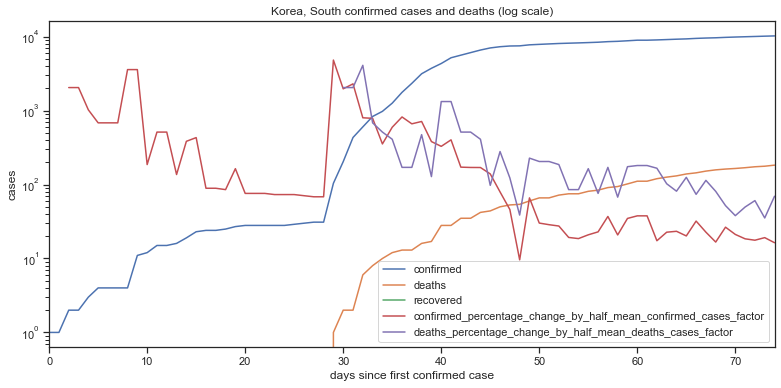

In [9]:
location.plot(title=location_name+' confirmed cases and deaths (linear scale)'); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
location.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

In [10]:
locations[location_name] = location

# Ireland

In [11]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = location['timelines'].values[0] # dictionary

confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

# merge
location = confirmed
location['deaths']       = deaths['deaths']
location['recovered']    = recovered['recovered']
locations[location_name] = location

# visual estimate of changes
half_mean_of_confirmed_cases = location['confirmed'].mean()/2
half_mean_of_deaths_cases    = location['confirmed'].mean()/2
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed'].pct_change()
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths'].pct_change()
# linear interpolation
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = location['deaths_percentage_change_by_half_mean_deaths_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location.tail()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
datetime,,,,,
2020-04-01 00:00:00+00:00,3447,85,NaN,19.431040,58.466103
2020-04-02 00:00:00+00:00,3849,98,NaN,34.579542,45.348078
2020-04-03 00:00:00+00:00,4273,120,NaN,32.662725,66.562721
2020-04-04 00:00:00+00:00,4604,137,NaN,22.968338,42.005111
2020-04-05 00:00:00+00:00,4994,158,NaN,25.116768,45.449927


In [12]:
# reindex to first confirmed case
location = location.query('confirmed > 0').reset_index(); del location['datetime']
location.head()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
0,1,0,NaN,inf,NaN
1,1,0,NaN,inf,NaN
2,1,0,NaN,296.506667,NaN
3,2,0,NaN,296.506667,NaN
4,6,0,NaN,593.013333,NaN


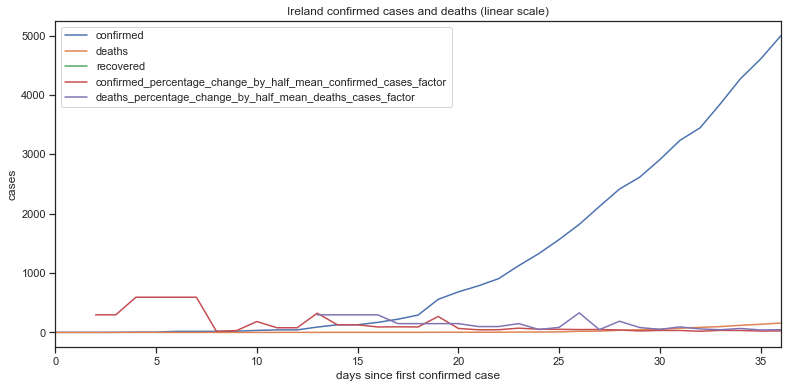

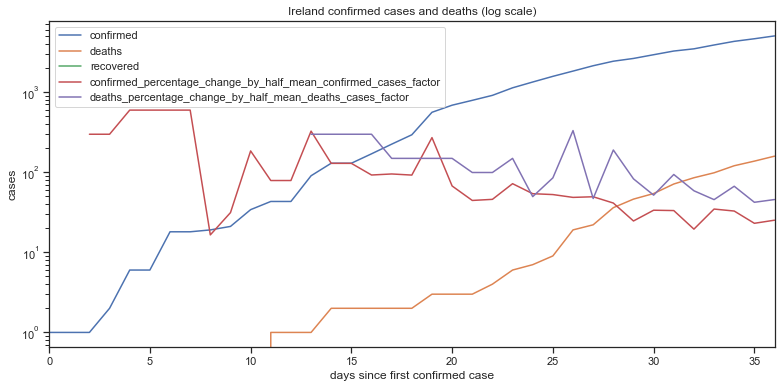

In [13]:
location.plot(title=location_name+' confirmed cases and deaths (linear scale)'); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
location.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

In [14]:
locations[location_name] = location

# United Kingdom (approximate)

In [15]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = location['timelines'].values[0] # dictionary

confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

# merge
location = confirmed
location['deaths']       = deaths['deaths']
location['recovered']    = recovered['recovered']
locations[location_name] = location

# visual estimate of changes
half_mean_of_confirmed_cases = location['confirmed'].mean()/2
half_mean_of_deaths_cases    = location['confirmed'].mean()/2
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed'].pct_change()
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths'].pct_change()
# linear interpolation
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = location['deaths_percentage_change_by_half_mean_deaths_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location.tail()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
datetime,,,,,
2020-04-01 00:00:00+00:00,29474,2352,NaN,406.697846,744.427196
2020-04-02 00:00:00+00:00,33718,2921,NaN,340.612414,572.267557
2020-04-03 00:00:00+00:00,38168,3605,NaN,312.192439,553.922136
2020-04-04 00:00:00+00:00,41903,4313,NaN,231.481016,464.571074
2020-04-05 00:00:00+00:00,47806,4934,NaN,333.235946,340.593471


In [16]:
# reindex to first confirmed case
location = location.query('confirmed > 0').reset_index(); del location['datetime']
location.head()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
0,2,0,NaN,inf,NaN
1,2,0,NaN,inf,NaN
2,2,0,NaN,inf,NaN
3,2,0,NaN,inf,NaN
4,2,0,NaN,1182.753333,NaN


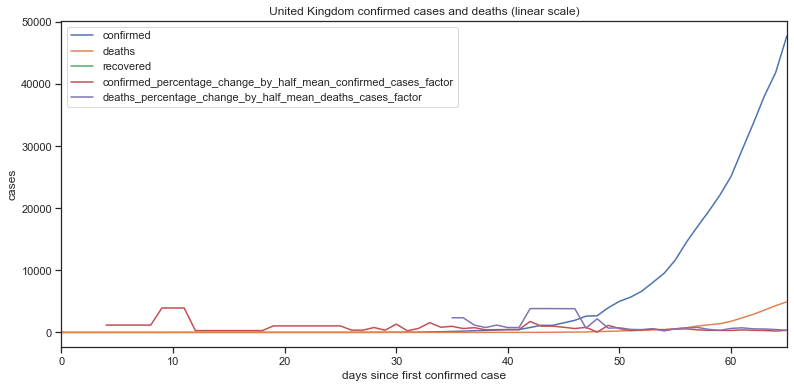

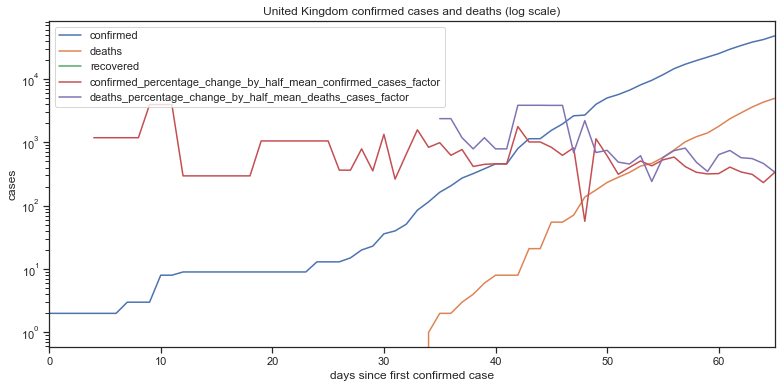

In [17]:
location.plot(title=location_name+' confirmed cases and deaths (linear scale)'); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
location.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

In [18]:
locations[location_name] = location

# Germany

In [19]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = location['timelines'].values[0] # dictionary

confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

# merge
location = confirmed
location['deaths']       = deaths['deaths']
location['recovered']    = recovered['recovered']
locations[location_name] = location

# visual estimate of changes
half_mean_of_confirmed_cases = location['confirmed'].mean()/2
half_mean_of_deaths_cases    = location['confirmed'].mean()/2
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed'].pct_change()
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths'].pct_change()
# linear interpolation
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = location['deaths_percentage_change_by_half_mean_deaths_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location.tail()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
datetime,,,,,
2020-04-01 00:00:00+00:00,77872,920,NaN,584.825374,1295.705032
2020-04-02 00:00:00+00:00,84794,1107,NaN,615.587953,1407.646565
2020-04-03 00:00:00+00:00,91159,1275,NaN,519.844114,1050.997073
2020-04-04 00:00:00+00:00,96092,1444,NaN,374.758428,917.944376
2020-04-05 00:00:00+00:00,100123,1584,NaN,290.512893,671.429917


In [20]:
# reindex to first confirmed case
location = location.query('confirmed > 0').reset_index(); del location['datetime']
location.head()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
0,1,0,NaN,inf,NaN
1,4,0,NaN,20775.96,NaN
2,4,0,NaN,20775.96,NaN
3,4,0,NaN,1731.33,NaN
4,5,0,NaN,1731.33,NaN


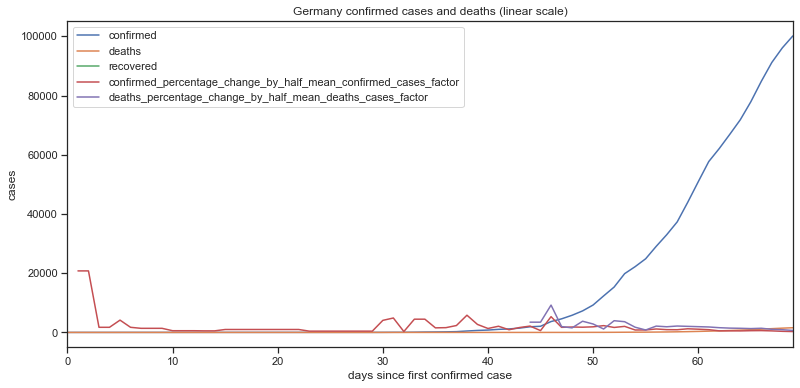

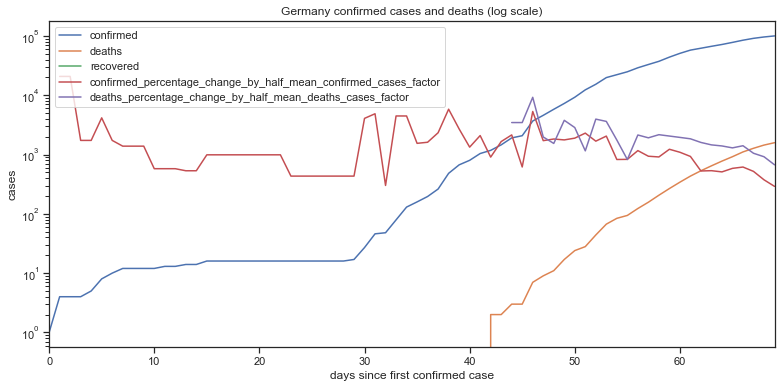

In [21]:
location.plot(title=location_name+' confirmed cases and deaths (linear scale)'); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
location.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

In [22]:
locations[location_name] = location

# Italy

In [23]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = location['timelines'].values[0] # dictionary

confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

# merge
location = confirmed
location['deaths']       = deaths['deaths']
location['recovered']    = recovered['recovered']
locations[location_name] = location

# visual estimate of changes
half_mean_of_confirmed_cases = location['confirmed'].mean()/2
half_mean_of_deaths_cases    = location['confirmed'].mean()/2
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed'].pct_change()
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths'].pct_change()
# linear interpolation
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = location['deaths_percentage_change_by_half_mean_deaths_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location.tail()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
datetime,,,,,
2020-04-01 00:00:00+00:00,110574,13155,NaN,545.530348,705.984778
2020-04-02 00:00:00+00:00,115242,13915,NaN,509.495084,697.244201
2020-04-03 00:00:00+00:00,119827,14681,NaN,480.165248,664.366507
2020-04-04 00:00:00+00:00,124632,15362,NaN,483.950426,559.826747
2020-04-05 00:00:00+00:00,128948,15887,NaN,417.940101,412.452285


In [24]:
# reindex to first confirmed case
location = location.query('confirmed > 0').reset_index(); del location['datetime']
location.head()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
0,2,0,NaN,inf,NaN
1,2,0,NaN,inf,NaN
2,2,0,NaN,inf,NaN
3,2,0,NaN,inf,NaN
4,2,0,NaN,6034.373333,NaN


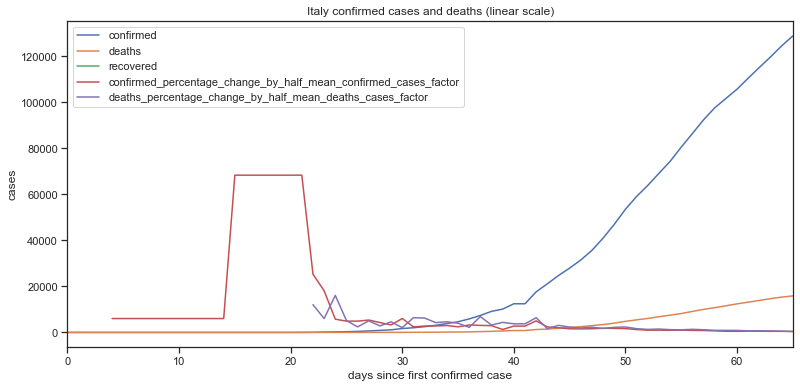

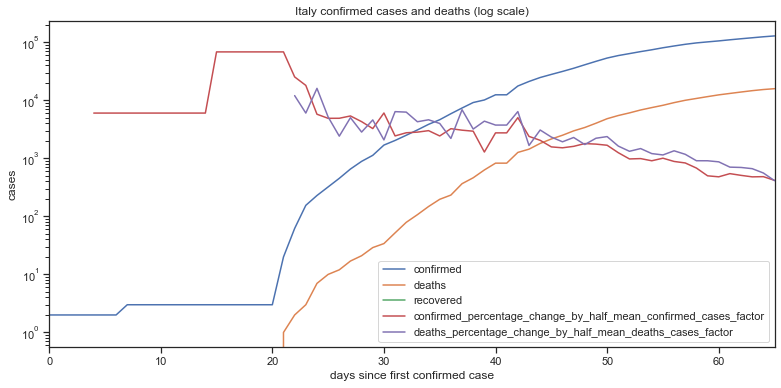

In [25]:
location.plot(title=location_name+' confirmed cases and deaths (linear scale)'); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
location.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

In [26]:
locations[location_name] = location

# United States of America

In [27]:
location_name = 'US'
location = df.query('country == @location_name')
location = location['timelines'].values[0] # dictionary

confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

# merge
location = confirmed
location['deaths']       = deaths['deaths']
location['recovered']    = recovered['recovered']
locations[location_name] = location

# visual estimate of changes
half_mean_of_confirmed_cases = location['confirmed'].mean()/2
half_mean_of_deaths_cases    = location['confirmed'].mean()/2
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed'].pct_change()
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths'].pct_change()
# linear interpolation
location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = location['deaths_percentage_change_by_half_mean_deaths_cases_factor'].replace(0, np.nan).interpolate(method='nearest')
location.tail()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
datetime,,,,,
2020-04-01 00:00:00+00:00,213372,4757,NaN,2201.021236,3751.314371
2020-04-02 00:00:00+00:00,243453,5926,NaN,2317.040017,4038.871654
2020-04-03 00:00:00+00:00,275586,7087,NaN,2169.276124,3219.951019
2020-04-04 00:00:00+00:00,308850,8407,NaN,1983.791447,3061.189333
2020-04-05 00:00:00+00:00,337072,9619,NaN,1501.823427,2369.410263


In [28]:
# reindex to first confirmed case
location = location.query('confirmed > 0').reset_index(); del location['datetime']
location.head()

,confirmed,deaths,recovered,confirmed_percentage_change_by_half_mean_confirmed_cases_factor,deaths_percentage_change_by_half_mean_deaths_cases_factor
0,1,0,NaN,NaN,NaN
1,1,0,NaN,NaN,NaN
2,2,0,NaN,16435.34,NaN
3,2,0,NaN,16435.34,NaN
4,5,0,NaN,24653.01,NaN


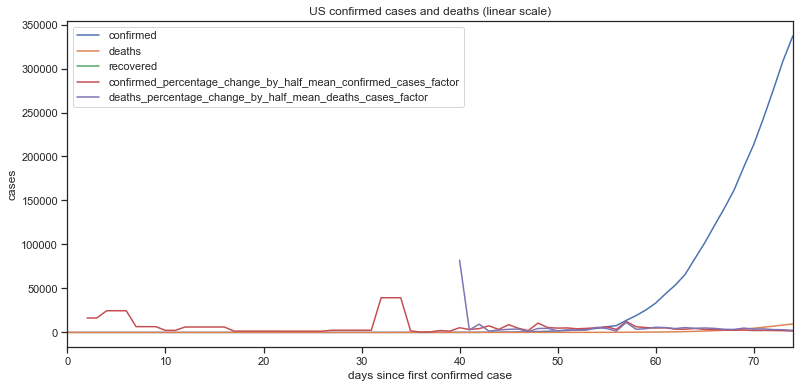

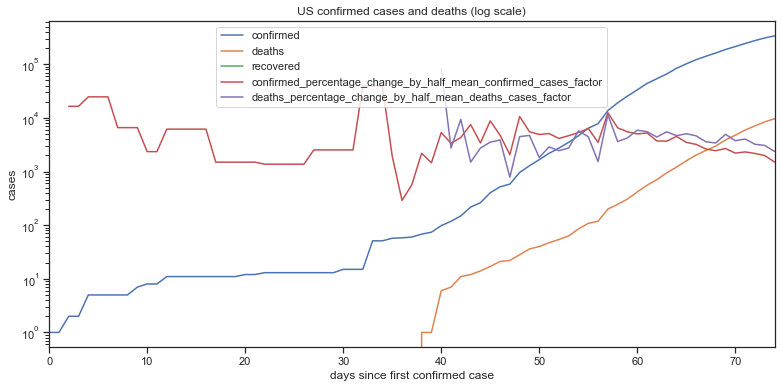

In [29]:
location.plot(title=location_name+' confirmed cases and deaths (linear scale)'); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
location.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

---

In [30]:
South_Korea              = locations['Korea, South']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
locations_list           = [South_Korea, Ireland, United_Kingdom, Germany, Italy, United_States_of_America]

In [31]:
_df = pd.merge(South_Korea.add_suffix('_South_Korea'), Ireland.add_suffix('_Ireland'), how='inner', left_index=True, right_index=True)
_df = pd.merge(_df, United_Kingdom.add_suffix('_United_Kingdom'), how='inner', left_index=True, right_index=True)
_df = pd.merge(_df, United_Kingdom.add_suffix('_Germany'), how='inner', left_index=True, right_index=True)
_df = pd.merge(_df, United_Kingdom.add_suffix('_Italy'), how='inner', left_index=True, right_index=True)
_df = pd.merge(_df, United_Kingdom.add_suffix('_United_States_of_America'), how='inner', left_index=True, right_index=True)
_df.tail()

,confirmed_South_Korea,deaths_South_Korea,recovered_South_Korea,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea,deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea,confirmed_Ireland,deaths_Ireland,recovered_Ireland,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Ireland,deaths_percentage_change_by_half_mean_deaths_cases_factor_Ireland,confirmed_United_Kingdom,deaths_United_Kingdom,recovered_United_Kingdom,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_United_Kingdom,deaths_percentage_change_by_half_mean_deaths_cases_factor_United_Kingdom,confirmed_Germany,deaths_Germany,recovered_Germany,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Germany,deaths_percentage_change_by_half_mean_deaths_cases_factor_Germany,confirmed_Italy,deaths_Italy,recovered_Italy,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Italy,deaths_percentage_change_by_half_mean_deaths_cases_factor_Italy,confirmed_United_States_of_America,deaths_United_States_of_America,recovered_United_States_of_America,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_United_States_of_America,deaths_percentage_change_by_half_mean_deaths_cases_factor_United_States_of_America
32,602,6,NaN,799.855273,4098.666667,3447,85,NaN,19.431040,58.466103,51,0,NaN,650.514333,NaN,51,0,NaN,650.514333,NaN,51,0,NaN,650.514333,NaN,51,0,NaN,650.514333,NaN
33,833,8,NaN,786.372093,683.111111,3849,98,NaN,34.579542,45.348078,85,0,NaN,1577.004444,NaN,85,0,NaN,1577.004444,NaN,85,0,NaN,1577.004444,NaN,85,0,NaN,1577.004444,NaN
34,977,10,NaN,354.266507,512.333333,4273,120,NaN,32.662725,66.562721,115,1,NaN,834.884706,inf,115,1,NaN,834.884706,inf,115,1,NaN,834.884706,inf,115,1,NaN,834.884706,inf
35,1261,12,NaN,595.712044,409.866667,4604,137,NaN,22.968338,42.005111,163,2,NaN,987.341913,2365.506667,163,2,NaN,987.341913,2365.506667,163,2,NaN,987.341913,2365.506667,163,2,NaN,987.341913,2365.506667
36,1766,13,NaN,820.708432,170.777778,4994,158,NaN,25.116768,45.449927,206,2,NaN,624.029366,2365.506667,206,2,NaN,624.029366,2365.506667,206,2,NaN,624.029366,2365.506667,206,2,NaN,624.029366,2365.506667


In [32]:
__df = _df[[
    'confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea',
    'confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Ireland',
    'confirmed_percentage_change_by_half_mean_confirmed_cases_factor_United_Kingdom',
    'confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Germany',
    'confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Italy',
    'confirmed_percentage_change_by_half_mean_confirmed_cases_factor_United_States_of_America']]
__df.tail()

,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Ireland,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_United_Kingdom,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Germany,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Italy,confirmed_percentage_change_by_half_mean_confirmed_cases_factor_United_States_of_America
32,799.855273,19.431040,650.514333,650.514333,650.514333,650.514333
33,786.372093,34.579542,1577.004444,1577.004444,1577.004444,1577.004444
34,354.266507,32.662725,834.884706,834.884706,834.884706,834.884706
35,595.712044,22.968338,987.341913,987.341913,987.341913,987.341913
36,820.708432,25.116768,624.029366,624.029366,624.029366,624.029366


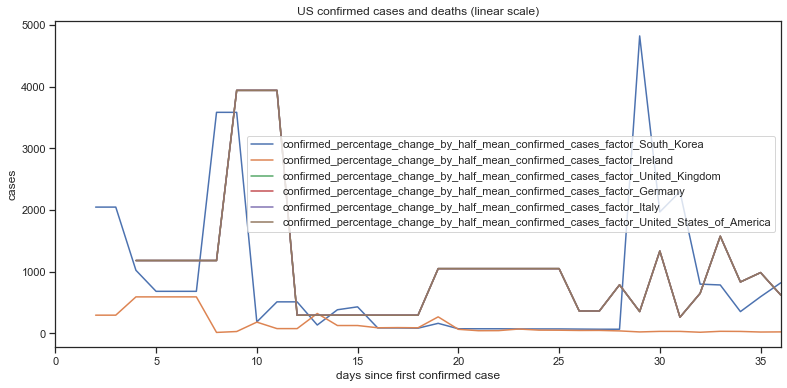

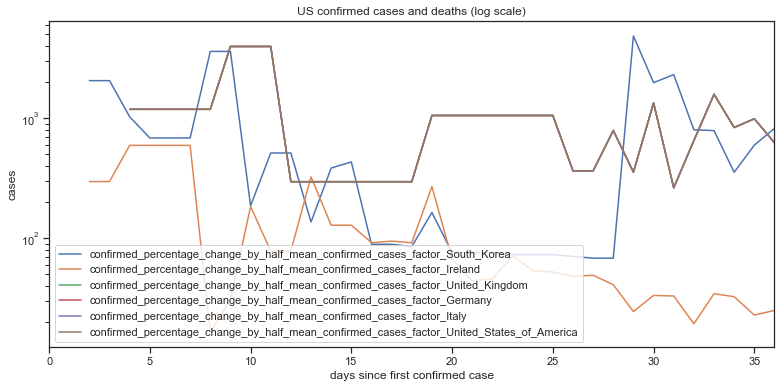

In [33]:
__df.plot(title=location_name+' confirmed cases and deaths (linear scale)'); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

In [34]:
___df = _df[[
    'deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea',
    'deaths_percentage_change_by_half_mean_deaths_cases_factor_Ireland',
    'deaths_percentage_change_by_half_mean_deaths_cases_factor_United_Kingdom',
    'deaths_percentage_change_by_half_mean_deaths_cases_factor_Germany',
    'deaths_percentage_change_by_half_mean_deaths_cases_factor_Italy',
    'deaths_percentage_change_by_half_mean_deaths_cases_factor_United_States_of_America']]
___df.tail()

,deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea,deaths_percentage_change_by_half_mean_deaths_cases_factor_Ireland,deaths_percentage_change_by_half_mean_deaths_cases_factor_United_Kingdom,deaths_percentage_change_by_half_mean_deaths_cases_factor_Germany,deaths_percentage_change_by_half_mean_deaths_cases_factor_Italy,deaths_percentage_change_by_half_mean_deaths_cases_factor_United_States_of_America
32,4098.666667,58.466103,NaN,NaN,NaN,NaN
33,683.111111,45.348078,NaN,NaN,NaN,NaN
34,512.333333,66.562721,inf,inf,inf,inf
35,409.866667,42.005111,2365.506667,2365.506667,2365.506667,2365.506667
36,170.777778,45.449927,2365.506667,2365.506667,2365.506667,2365.506667


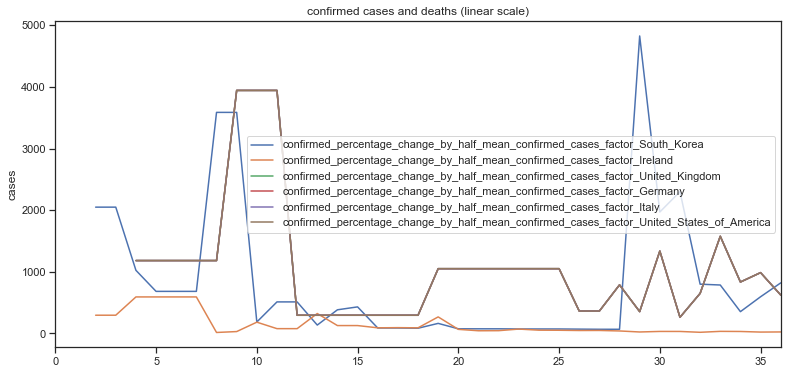

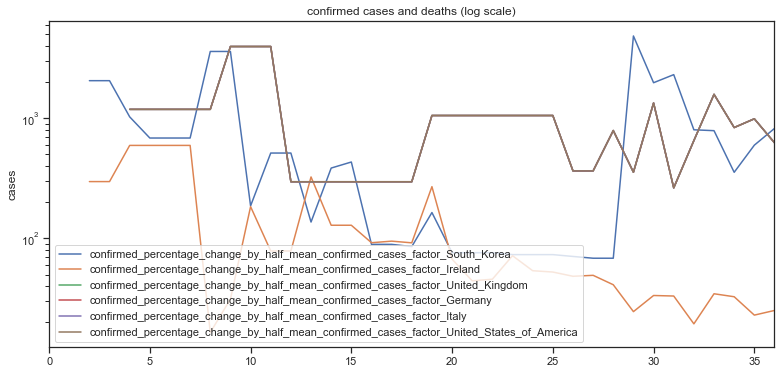

In [35]:
__df.plot(title='confirmed cases and deaths (linear scale)'); plt.ylabel('cases');
__df.plot(title='confirmed cases and deaths (log scale)', logy=True); plt.ylabel('cases');